Import the dataset

In [51]:
import kagglehub

path = kagglehub.dataset_download("thedevastator/books-sales-and-ratings")



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

df = pd.read_csv(os.path.join(path, "Books_Data_Clean.csv"))

df.head(3)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500


In [53]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [54]:
df = df[df['Publishing Year'] > 1900 ]

df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,535.926660,1994.730426,4.012230,94817.793855,1832.644985,841.360638,4.844311,613.314172,9744.482656
std,308.769358,23.204719,0.246492,31473.890412,3947.885096,2279.579848,3.561712,369.628663,15350.021050
min,0.000000,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,271.000000,1989.000000,3.860000,70701.000000,366.300000,0.000000,1.990000,291.000000,570.000000
50%,535.000000,2003.000000,4.030000,89204.000000,792.000000,273.240000,3.990000,596.000000,3942.000000
75%,802.000000,2010.000000,4.180000,113400.000000,1470.260000,714.756000,6.990000,933.000000,5427.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [55]:
df.isna().sum() # we remove the books that don't have a name


index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [56]:
df.dropna(subset='Book Name', inplace=True)
df.duplicated().sum()

np.int64(0)

In [57]:
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

Histogram for the publishing years

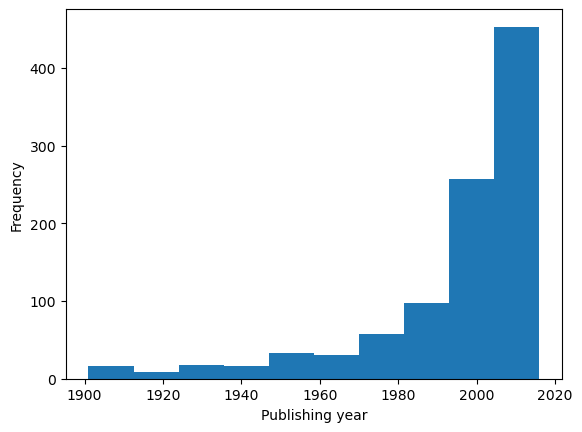

In [58]:
plt.hist(df['Publishing Year'])
plt.xlabel('Publishing year')
plt.ylabel('Frequency')
plt.show()

Barchart with nr of books from each genre

Text(0.5, 1.0, 'Number of books in each Genre')

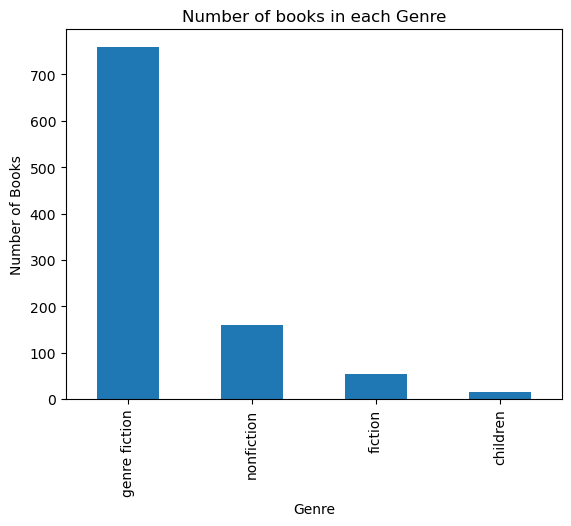

In [59]:
df['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.title('Number of books in each Genre')

In [60]:
df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

<Axes: xlabel='genre', ylabel='Book_ratings_count'>

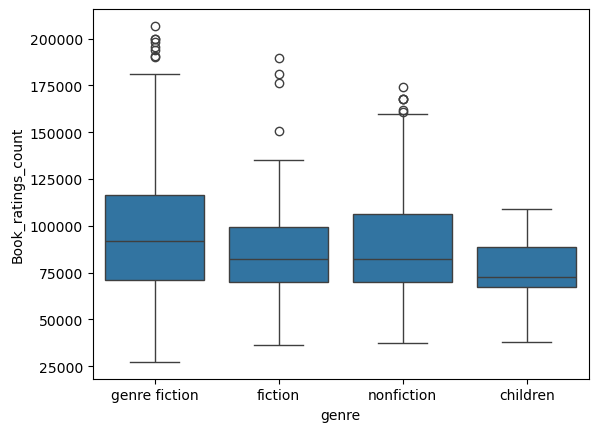

In [61]:
sns.boxplot(x='genre', y='Book_ratings_count', data = df )

<Axes: xlabel='sale price', ylabel='units sold'>

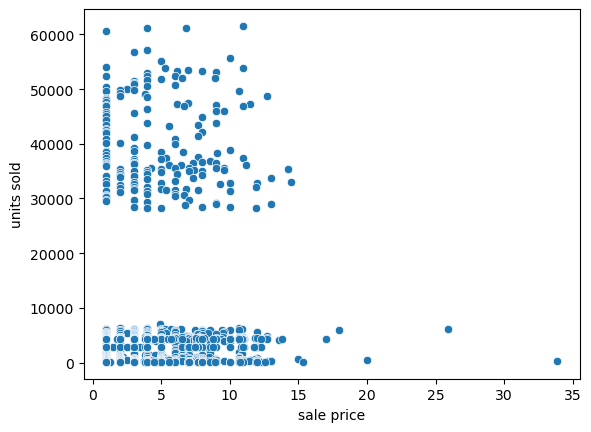

In [62]:
sns.scatterplot(data = df, x='sale price', y = 'units sold')

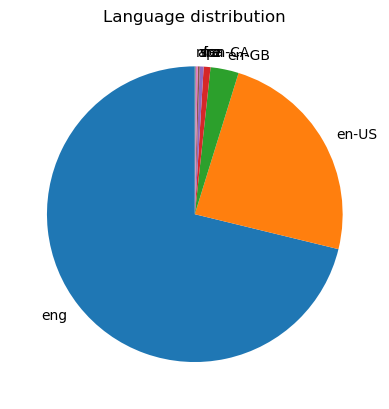

In [63]:
language_counts = df['language_code'].value_counts()

plt.pie(language_counts, labels=language_counts.index, startangle=90)
plt.title('Language distribution')
plt.show()

In [75]:
# calculate total revenue based on a publisher

df.groupby('Publisher ')['publisher revenue'].sum().sort_values(ascending=False)

df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [74]:
df.groupby('Author_Rating')['Book_ratings_count'].mean()

Author_Rating
Excellent        83804.800595
Famous           98295.250000
Intermediate    101400.272569
Novice           87318.464286
Name: Book_ratings_count, dtype: float64

In [79]:
# count the nr of books in each language

df.groupby('language_code').size()

language_code
ara        2
en-CA      7
en-GB     29
en-US    226
eng      670
fre        4
nl         1
spa        2
dtype: int64

In [82]:
df.groupby('Author_Rating')['Book_ratings_count'].describe()
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

Text(0, 0.5, 'Book_average_rating')

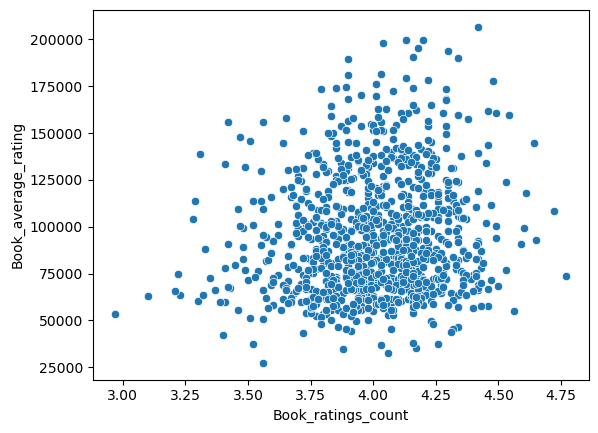

In [ ]:
# scatterplot with book avg rating and book rating count
sns.scatterplot(data = df, y='Book_ratings_count',   x= 'Book_average_rating')
plt.ylabel('Book_ratings_count')
plt.xlabel('Book_average_rating')

In [90]:
total_gross_sales_by_author = df.groupby('Author')['gross sales'].sum()

<Axes: xlabel='Author'>

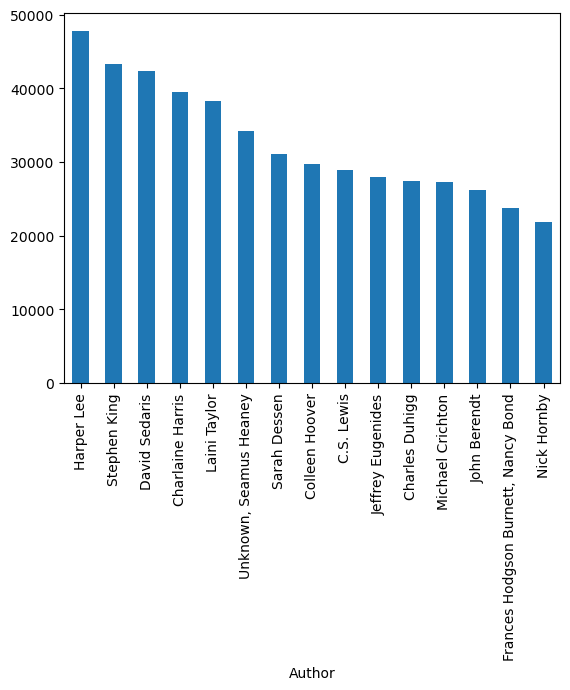

In [95]:
total_gross_sales_by_author.sort_values(ascending=False).head(15).plot(kind = 'bar')

Text(0.5, 0, 'Units sold')

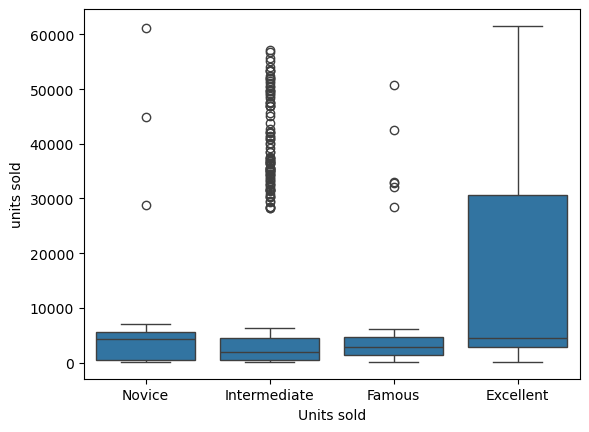

In [97]:
sns.boxplot(data = df, x = 'Author_Rating', y = 'units sold')
plt.xlabel("Author Ratings")
plt.xlabel("Units sold")

Text(0, 0.5, 'Total units sold')

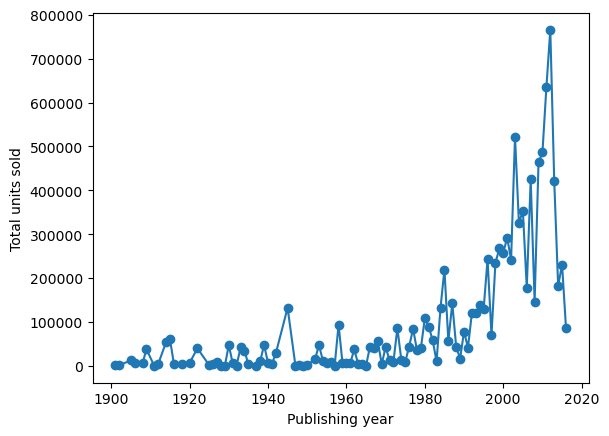

In [103]:
# group by publishing year and see the units sold over the years

df.groupby('Publishing Year')['units sold'].sum().plot(kind = 'line', marker = 'o')
plt.xlabel("Publishing year")
plt.ylabel('Total units sold')